# Computer Vision Assignment 1 Part 1
---

Semester: **Fall 2022**

Due date: **September 29th 2022, 11.59PM EST.**

## Introduction
---

This assignment is an introduction to using PyTorch for training simple neural net models. Two different datasets will be used: 
- MNIST (handwritten digits)
- CIFAR-10 (32x32 resolution color images of 10 object classes)

## Instructions
---

You should perform this assignment using Google Colab. 
* Before starting, clone this assignment using `File > Save a copy in Drive`. 
* After you're done, go through the notebook and ensure that you have answered all questions.
* Finally, submit the ipynb `File > Download > Download .ipynb` on brightspace


## 1. Warmup [5%]
---

It is always good practice to visually inspect your data before trying to train a model, since it lets you check for problems and get a feel for the task at hand. MNIST is a dataset of 70,000 grayscale hand-written digits (0 through 9).
60,000 of these are training images. 10,000 are a held out test set. On the other hand, CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). The train/test split is 50k/10k.

* (a) Display 10 random images from each class of MNIST
* (b) Do the same for each class of CIFAR-10

Use `matplotlib` and ipython notebook's visualization capabilities. See [this PyTorch tutorial page](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) for hints on how to achieve this.

## 2. Training a Single Layer Network on MNIST [10%]
---

* (a) Start by running the training on MNIST.
By default if you run this notebook successfully, it will train on MNIST.

This will initialize a single layer model and train it on the 60,000 MNIST training images for 1 epoch (passes through the training data). The loss function ([cross_entropy](http://pytorch.org/docs/master/nn.html?highlight=cross_entropy#torch.nn.functional.cross_entropy)) computes a Logarithm of the Softmax on the output of the neural network, and then computes the negative log-likelihood w.r.t. the given `target`. The default values for the learning rate, batch size and number of epochs are given in the `options` cell of this notebook. Unless otherwise specified, use the default values throughout this assignment. Note the decrease in training loss and corresponding decrease in validation errors.

* (b): Add code to plot out the network weights as images (one for each output, of size 28 by 28) after the last epoch. (Hint threads: [#1](https://discuss.pytorch.org/t/understanding-deep-network-visualize-weights/2060/2?u=smth) [#2](https://github.com/pytorch/vision#utils) )

* (c): Reduce the number of training examples to just 50. (Hint: limit the iterator in the `train` function) and train the model until the loss converges. Explain what is happening to the model.

## 3. Training a Multi-Layer Network on MNIST [10%]
---

* (a) Add an extra layer with 1000 hidden units and a `tanh` nonlinearity. (Hint: modify the `Net` class). Train the model for 10 epochs.
* (b) Now set the learning rate to 10 and observe what happens during training. Give a brief explanation of your observations

## 4. Training a Convolutional Network on CIFAR [25%]
---

To change over to the CIFAR-10 dataset, change the `options` cell's `dataset` variable to `'cifar10'`.

- (a) Create a convolutional network with the following architecture:
  - Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

* (b) Train it for 20 epochs on the CIFAR-10 training set. Show an image of the first layer filters.

* (c) Give a breakdown of the parameters within the above model, and the overall number.

Hints: [Follow the first PyTorch tutorial](http://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html) or look at the [MNIST example](https://github.com/pytorch/examples/tree/master/mnist). Also, you may speed up training if you use a GPU runtime (`RunTime > Change Runtime Type > GPU`).

# Answers

## 1

### MNIST

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])
mnist_train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
mnist_classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

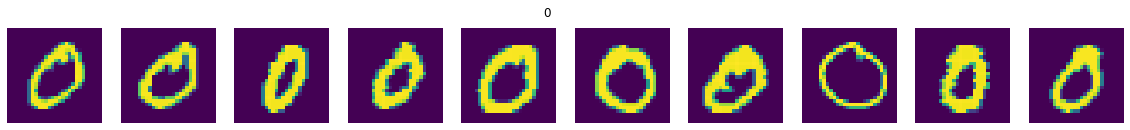

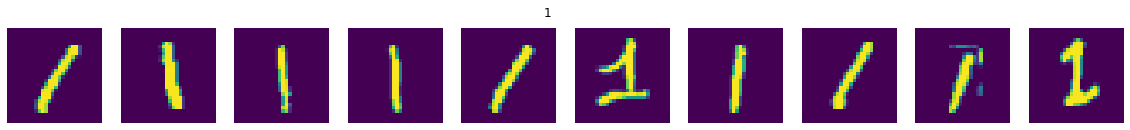

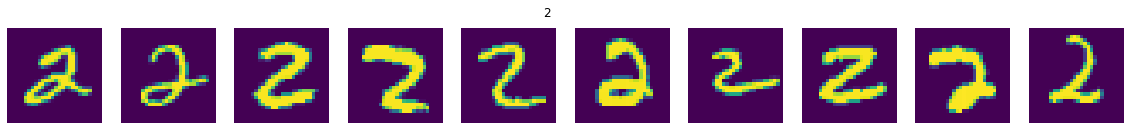

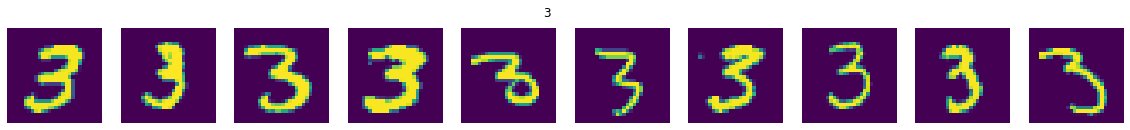

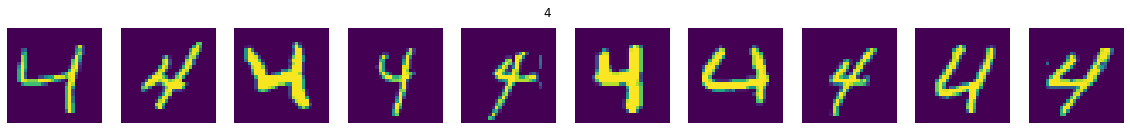

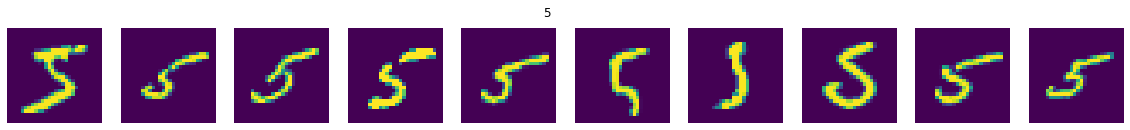

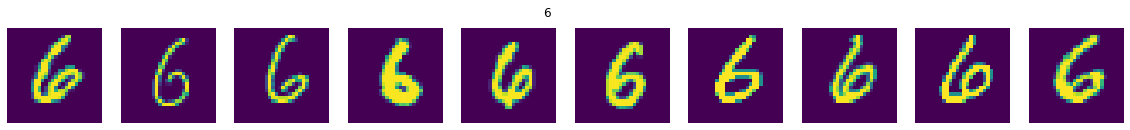

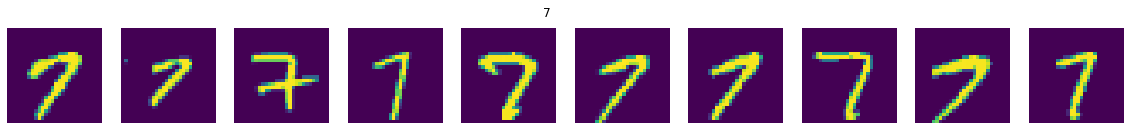

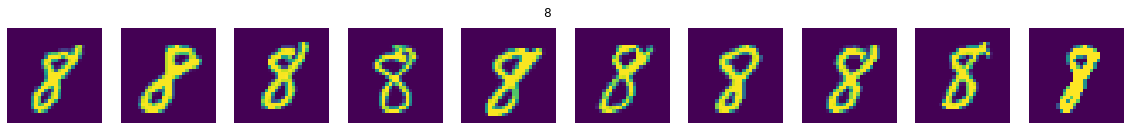

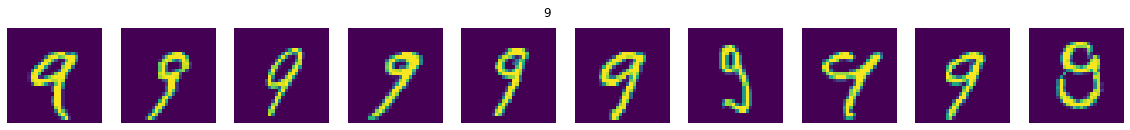

In [ ]:
mnist_disp_imgs = {cls: [] for cls in mnist_classes}

for img, idx in mnist_train_set:
    if sum([len(disp_imgs[cls]) == 10 for cls in mnist_classes]) == 10:
        break
    if len(mnist_disp_imgs[mnist_classes[idx]]) < 10:
        mnist_disp_imgs[mnist_classes[idx]].append(img.numpy())

for i in range(10):
    fig = plt.figure(figsize=(20, 2))
    fig.suptitle(mnist_classes[i])
    for j in range(10):
        ax = fig.add_subplot(1, 10, j+1)
        ax.imshow(mnist_disp_imgs[mnist_classes[i]][j][0])
        ax.axis('off')
fig.show()

### CIFAR10

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])
cifar10_train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
cifar10_test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
cifar10_classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


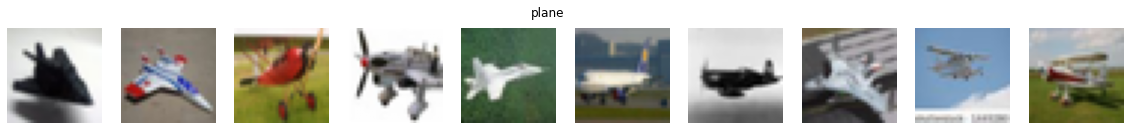

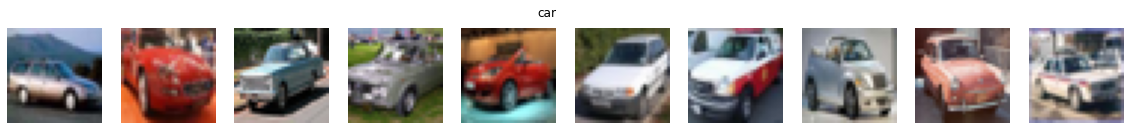

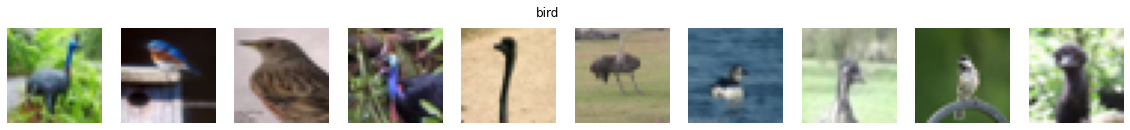

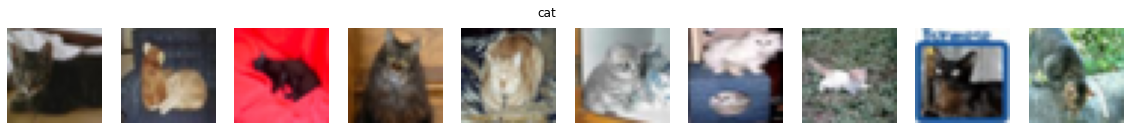

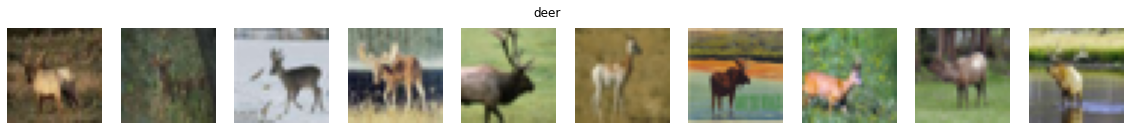

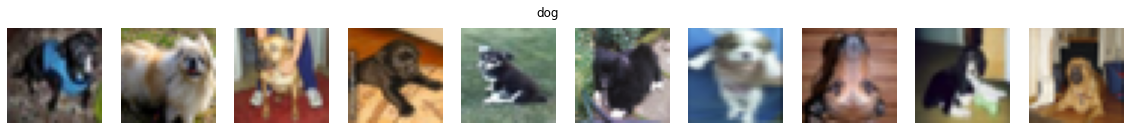

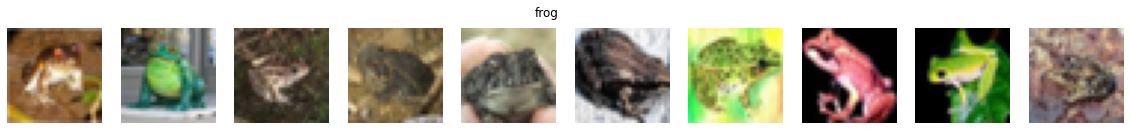

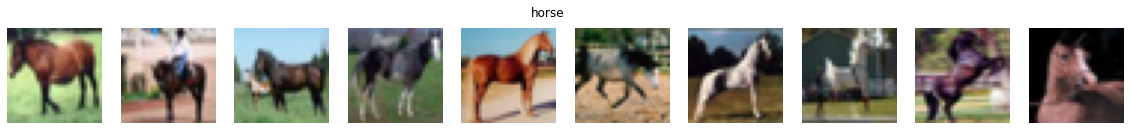

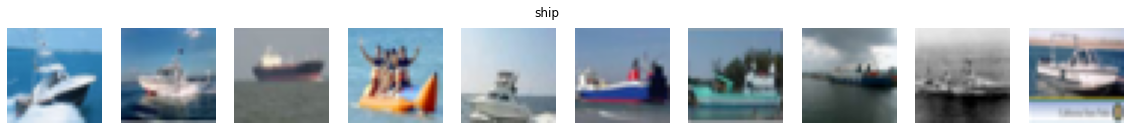

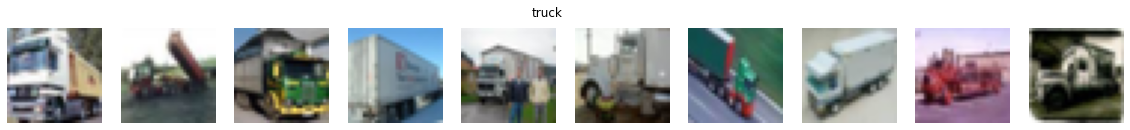

In [ ]:
cifar10_disp_imgs = {cls: [] for cls in cifar10_classes}

for img, idx in cifar10_train_set:
    if sum([len(cifar10_disp_imgs[cls]) == 10 for cls in cifar10_classes]) == 10:
        break
    if len(cifar10_disp_imgs[cifar10_classes[idx]]) < 10:
        cifar10_disp_imgs[cifar10_classes[idx]].append(img.numpy())

for i in range(10):
    fig = plt.figure(figsize=(20, 2))
    fig.suptitle(cifar10_classes[i])
    for j in range(10):
        ax = fig.add_subplot(1, 10, j+1)
        ax.imshow(np.transpose(cifar10_disp_imgs[cifar10_classes[i]][j], (1, 2, 0)))
        ax.axis('off')
fig.show()

## 2

### a

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))])
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, x):
        x = x.view(-1, self.num_inputs) # reshape input to batch x num_inputs
        x = self.linear(x)
        return x

model = Net(784, 10)
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 20
model.train()
for e in range(1, epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
    print('Train Epoch: {}  Loss: {:.6f}'.format(e, loss.item()))
        
model.eval()
test_loss = 0
correct = 0
for data, target in test_loader:
    output = model(data)
    test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
    pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
    correct += pred.eq(target.data.view_as(pred)).cpu().sum()

test_loss /= len(test_loader.dataset)
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

Train Epoch: 1  Loss: 0.367583
Train Epoch: 2  Loss: 0.407179
Train Epoch: 3  Loss: 0.257361
Train Epoch: 4  Loss: 0.153542
Train Epoch: 5  Loss: 0.290846
Train Epoch: 6  Loss: 0.298441
Train Epoch: 7  Loss: 0.288511
Train Epoch: 8  Loss: 0.213341
Train Epoch: 9  Loss: 0.083850
Train Epoch: 10  Loss: 0.854144
Train Epoch: 11  Loss: 0.093872
Train Epoch: 12  Loss: 0.110903
Train Epoch: 13  Loss: 0.076095
Train Epoch: 14  Loss: 0.194641
Train Epoch: 15  Loss: 0.117950
Train Epoch: 16  Loss: 0.309666
Train Epoch: 17  Loss: 0.129076
Train Epoch: 18  Loss: 0.223038
Train Epoch: 19  Loss: 0.022523

Test set: Average loss: 0.2682, Accuracy: 9235/10000 (92%)



### b

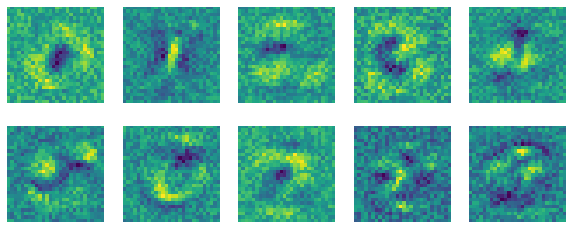

In [24]:
layer_weights = model.linear.weight.data.numpy()
fig = plt.figure(figsize=(10, 4))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    weight = layer_weights[i, :]
    weight = weight.reshape(28, 28)
    ax.imshow(weight)
    ax.axis('off')

### c

In [38]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))])
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Here I change the batch size to 50 to train only 50 images
train_loader = torch.utils.data.DataLoader(train_set, batch_size=50, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=50, shuffle=False)

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, x):
        x = x.view(-1, self.num_inputs) # reshape input to batch x num_inputs
        x = self.linear(x)
        return x

model = Net(784, 10)
optimizer = optim.SGD(model.parameters(), lr=0.01)

loss1 = loss2 = loss3 = 10
model.train()
data, target = _, _
for d, t in train_loader:
    data = d
    target = t
    break
while True:
    loss_ = 0
    counter += 1
    optimizer.zero_grad()
    output = model(data)
    loss = F.cross_entropy(output, target)
    loss.backward()
    loss_ = loss.item()
    optimizer.step()
    loss1, loss2 = loss2, loss3
    loss3 = loss_
    if abs(loss1 - loss2) < 0.005 and abs(loss2 - loss3) < 0.005:    # assume it's converged
        break
        
model.eval()
test_loss = 0
correct = 0
for data, target in test_loader:
    output = model(data)
    test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
    pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
    correct += pred.eq(target.data.view_as(pred)).cpu().sum()

test_loss /= len(test_loader.dataset)
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))


Test set: Average loss: 1.1008, Accuracy: 6654/10000 (67%)



**Answer**

Since the model trained on only 50 images, the model would overfit, which caused the low accuracy compared to part a.

## 3

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

### a

In [ ]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))])
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

class Net2(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net2, self).__init__()
        self.num_inputs = num_inputs
        self.fc1 = nn.Linear(num_inputs, 1000)
        self.fc2 = nn.Linear(1000, num_outputs)


    def forward(self, x):
        x = x.view(-1, self.num_inputs) # reshape input to batch x num_inputs
        x = self.fc2(F.tanh(self.fc1(x)))
        return x

model = Net2(784, 10)
optimizer = optim.SGD(model.parameters(), lr=0.01)

epoch = 10
model.train()
for e in range(epoch):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 200 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                e+1, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
        
model.eval()
test_loss = 0
correct = 0
for data, target in test_loader:
    output = model(data)
    test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
    pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
    correct += pred.eq(target.data.view_as(pred)).cpu().sum()

test_loss /= len(test_loader.dataset)
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.260023
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.507159
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.634411
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.293590
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.309351
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.486514
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.233094
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.463550
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.256414
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.210891
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.237469
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.250838
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.217133
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.287448
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.308354
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.381708
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.173299
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.453701
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.276931
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.237730
Train Epoch: 5 [0/60

### b

In [ ]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))])
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

class Net2(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net2, self).__init__()
        self.num_inputs = num_inputs
        self.fc1 = nn.Linear(num_inputs, 1000)
        self.fc2 = nn.Linear(1000, num_outputs)


    def forward(self, x):
        x = x.view(-1, self.num_inputs) # reshape input to batch x num_inputs
        x = self.fc2(F.tanh(self.fc1(x)))
        return x

model = Net2(784, 10)
optimizer = optim.SGD(model.parameters(), lr=10)

epoch = 10
model.train()
for e in range(epoch):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 200 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                e+1, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
        
model.eval()
test_loss = 0
correct = 0
for data, target in test_loader:
    output = model(data)
    test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
    pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
    correct += pred.eq(target.data.view_as(pred)).cpu().sum()

test_loss /= len(test_loader.dataset)
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.379897
Train Epoch: 1 [12800/60000 (21%)]	Loss: 543.899597
Train Epoch: 1 [25600/60000 (43%)]	Loss: 536.733093
Train Epoch: 1 [38400/60000 (64%)]	Loss: 793.691711
Train Epoch: 1 [51200/60000 (85%)]	Loss: 460.574219
Train Epoch: 2 [0/60000 (0%)]	Loss: 759.874023
Train Epoch: 2 [12800/60000 (21%)]	Loss: 464.711182
Train Epoch: 2 [25600/60000 (43%)]	Loss: 461.373871
Train Epoch: 2 [38400/60000 (64%)]	Loss: 188.975983
Train Epoch: 2 [51200/60000 (85%)]	Loss: 237.918442
Train Epoch: 3 [0/60000 (0%)]	Loss: 431.266357
Train Epoch: 3 [12800/60000 (21%)]	Loss: 99.538147
Train Epoch: 3 [25600/60000 (43%)]	Loss: 156.716934
Train Epoch: 3 [38400/60000 (64%)]	Loss: 225.391998
Train Epoch: 3 [51200/60000 (85%)]	Loss: 298.781769
Train Epoch: 4 [0/60000 (0%)]	Loss: 649.969604
Train Epoch: 4 [12800/60000 (21%)]	Loss: 315.868835
Train Epoch: 4 [25600/60000 (43%)]	Loss: 176.642838
Train Epoch: 4 [38400/60000 (64%)]	Loss: 63.875229
Train Epoch: 4 [51200/60000 (85%)]	L

**Answer**
The loss is fluctuating in a wide range. Because the learning rate is too high, the weight updates too much each batch and it won't reach to a minima and thus the accuracy is low.

## 4

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_set = datasets.CIFAR10(root='./data', train=True, download=True, transform=data_transform)
test_set = datasets.CIFAR10(root='./data', train=False, download=True, transform=data_transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader  = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


### a

In [3]:
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.mp1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 128, 5)
        self.mp2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(3200, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.mp1(F.tanh(self.conv1(x)))
        x = self.mp2(F.tanh(self.conv2(x)))
        x = x.view(x.shape[0], -1)
        x = self.fc2(F.tanh(self.fc1(x)))
        return x

### b

In [4]:
model = Net3()
optimizer = optim.SGD(model.parameters(), lr=0.01)
model.to('cuda')

Net3(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (mp1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 128, kernel_size=(5, 5), stride=(1, 1))
  (mp2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3200, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)

In [5]:
epoch = 20
for e in range(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to('cuda'), target.to('cuda')
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
    print('Train Epoch: {} Loss: {:.6f}'.format(e+1, loss.item()))

C:\Users\CYX\anaconda3\envs\myenv\lib\site-packages\torch\nn\functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Train Epoch: 1 Loss: 2.007113
Train Epoch: 2 Loss: 1.624405
Train Epoch: 3 Loss: 1.641098
Train Epoch: 4 Loss: 1.374407
Train Epoch: 5 Loss: 1.211956
Train Epoch: 6 Loss: 1.134625
Train Epoch: 7 Loss: 1.664887
Train Epoch: 8 Loss: 1.377869
Train Epoch: 9 Loss: 1.012274
Train Epoch: 10 Loss: 1.114246
Train Epoch: 11 Loss: 1.312979
Train Epoch: 12 Loss: 0.928231
Train Epoch: 13 Loss: 1.295221
Train Epoch: 14 Loss: 0.974849
Train Epoch: 15 Loss: 1.043362
Train Epoch: 16 Loss: 1.135672
Train Epoch: 17 Loss: 0.875320
Train Epoch: 18 Loss: 1.096525
Train Epoch: 19 Loss: 0.887417
Train Epoch: 20 Loss: 0.663224


In [6]:
model.eval()
test_loss = 0
correct = 0
for data, target in test_loader:
    data, target = data.to('cuda'), target.to('cuda')
    output = model(data)
    test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
    pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
    correct += pred.eq(target.data.view_as(pred)).cpu().sum()

test_loss /= len(test_loader.dataset)
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))


Test set: Average loss: 1.0096, Accuracy: 6467/10000 (65%)



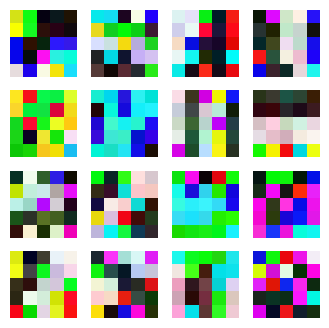

In [14]:
weights = model.conv1.weight.data.cpu().numpy()
weights = np.transpose(weights, (0, 2, 3, 1))
fig = plt.figure(figsize=(4, 4))
for i in range(4):
    for j in range(4):
        ax = fig.add_subplot(4, 4, i*4+j+1)
        ax.imshow((weights[i*4+j]*255).astype(np.uint8))
        ax.axis('off')

### c

|Layer|# Params|
|:--:|:--:|
|Conv1|$$3\times16\times5\times5+16 = 1216$$|
|MaxPool1|$$0$$|
|Conv2|$$16\times128\times5\times5+128 = 51328$$|
|MaxPool2|$$0$$|
|Linear1|$$3200\times64+64=204864$$|
|Linear2|$$64*10+10 = 650$$|
|Total|$$1216+51328+204864+650=258058$$|

In [13]:
from torchinfo import summary

summary(model, input_size=(1, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
Net3                                     [1, 10]                   --
├─Conv2d: 1-1                            [1, 16, 28, 28]           1,216
├─MaxPool2d: 1-2                         [1, 16, 14, 14]           --
├─Conv2d: 1-3                            [1, 128, 10, 10]          51,328
├─MaxPool2d: 1-4                         [1, 128, 5, 5]            --
├─Linear: 1-5                            [1, 64]                   204,864
├─Linear: 1-6                            [1, 10]                   650
Total params: 258,058
Trainable params: 258,058
Non-trainable params: 0
Total mult-adds (M): 6.29
Input size (MB): 0.01
Forward/backward pass size (MB): 0.20
Params size (MB): 1.03
Estimated Total Size (MB): 1.25

# EXAMPLE CODE

In [ ]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:
# Options
dataset = 'cifar10' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training
epochs = 10       # number of epochs to train
lr = 0.01        # learning rate

In [ ]:
# Data Loading
# This cell might take some time when you run it for the first time, 
# because it will download the datasets from the internet
if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)

elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified


In [ ]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [ ]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


In [ ]:
train(1)

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.346313
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1.911856
Train Epoch: 1 [12800/50000 (26%)]	Loss: 1.908965
Train Epoch: 1 [19200/50000 (38%)]	Loss: 1.821210
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.780919
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.526951
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.741250
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.822767


In [ ]:
test()


Test set: Average loss: 1.7750, Accuracy: 3931/10000 (39%)

